In [1]:
import os
os.getcwd()

'C:\\Users\\mislam41\\OneDrive - Kent State University\\Summer2025\\Deep_Learning\\oneNeuron\\oneNeuron\\Research work'

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 3E01-3866

 Directory of C:\Users\mislam41\OneDrive - Kent State University\Summer2025\Deep_Learning\oneNeuron\oneNeuron\Research work

06/17/2025  01:53 PM    <DIR>          .
06/17/2025  01:53 PM    <DIR>          ..
06/17/2025  01:53 PM    <DIR>          .ipynb_checkpoints
05/29/2025  04:09 PM           202,595 01Perceptron.ipynb
               1 File(s)        202,595 bytes
               3 Dir(s)  813,747,990,528 bytes free


In [3]:
with open("test.txt", "w") as f:
    f.writelines("Hello World")

In [4]:
ls

 Volume in drive C is OS
 Volume Serial Number is 3E01-3866

 Directory of C:\Users\mislam41\OneDrive - Kent State University\Summer2025\Deep_Learning\oneNeuron\oneNeuron\Research work

06/17/2025  01:53 PM    <DIR>          .
06/17/2025  01:53 PM    <DIR>          ..
06/17/2025  01:53 PM    <DIR>          .ipynb_checkpoints
05/29/2025  04:09 PM           202,595 01Perceptron.ipynb
06/17/2025  01:53 PM                11 test.txt
               2 File(s)        202,606 bytes
               3 Dir(s)  813,747,855,360 bytes free


## Implimentation of Perceptron

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib # FOR SAVING MY MODEL AS A BINARY FILE
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight") # THIS IS STYLE OF GRAPHS

In [6]:
np.random.randn(3)*1e-4

array([0.00012166, 0.00017796, 0.00013565])

In [7]:
-np.ones((4,1))

array([[-1.],
       [-1.],
       [-1.],
       [-1.]])

In [8]:
1e-4

0.0001

In [9]:
class Perceptron:
  def __init__(self, eta, epochs):
    self.weights = np.random.randn(3) * 1e-4 # SMALL WEIGHT INIT
    print(f"initial weights before training: \n{self.weights}")
    self.eta = eta # LEARNING RATE
    self.epochs = epochs 


  def activationFunction(self, inputs, weights):
    z = np.dot(inputs, weights) # z = W * X
    return np.where(z > 0, 1, 0) # CONDITION, IF TRUE, ELSE

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # CONCATINATION
    print(f"X with bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print("--"*10)
      print(f"for epoch: {epoch}")
      print("--"*10)

      y_hat = self.activationFunction(X_with_bias, self.weights) # foward propagation
      print(f"predicted value after forward pass: \n{y_hat}")
      self.error = self.y - y_hat
      print(f"error: \n{self.error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error) # backward propagation
      print(f"updated weights after epoch:\n{epoch}/{self.epochs} : \n{self.weights}")
      print("#####"*10)


  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(X), 1))]
    return self.activationFunction(X_with_bias, self.weights)

  def total_loss(self):
    total_loss = np.sum(self.error)
    print(f"total loss: {total_loss}")
    return total_loss


In [10]:
def prepare_data(df):
  X = df.drop("y", axis=1)

  y = df["y"]

  return X, y

## TRaining AND Gate

In [11]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,0,0,1],
}

df = pd.DataFrame(AND)

df

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [12]:
X,y = prepare_data(df)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [13]:
y

0    0
1    0
2    0
3    1
Name: y, dtype: int64

In [14]:
ETA = 0.3 # between 0 and 1
EPOCHS =5

model = Perceptron(eta = ETA, epochs = EPOCHS)
model.fit(X,y)
_=model.total_loss()

initial weights before training: 
[-4.92939553e-05  4.50174869e-05 -5.27356665e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch:
0/5 : 
[-0.30004929 -0.29995498  0.89994726]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch:
1/5 : 
[-4.92939553e-05  4.50174869e-05  5.99947264e-01]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch:
2/5 : 
[0.29995071 0.30004502 0.29994726]
############################

In [15]:
model.predict(X)

array([0, 0, 0, 1])

In [16]:
X.values

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]], dtype=int64)

In [17]:
inputs = np.array([[1,1], [0,1]])
model.predict(inputs)

array([1, 0])

In [18]:
def save_model(model, filename):
  model_dir = "models"
  os.makedirs(model_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
  filePath = os.path.join(model_dir, filename) # model/filename
  joblib.dump(model, filePath)

In [19]:
save_model(model, "and.model")

In [20]:
loaded_model = joblib.load("models/and.model")
inputs = np.array([[1,1], [1,0]])
loaded_model.predict(inputs)

array([1, 0])

 ## TRaining OR Gate

In [21]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,1],
}

df = pd.DataFrame(AND)

df

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [22]:
X,y = prepare_data(df)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [23]:
y

0    0
1    0
2    0
3    1
Name: y, dtype: int64

In [24]:
ETA = 0.3 # between 0 and 1
EPOCHS =10

model_OR = Perceptron(eta = ETA, epochs = EPOCHS)
model_OR.fit(X,y)
_=model_OR.total_loss()

initial weights before training: 
[-5.26132747e-05 -1.23572238e-05  3.17450384e-06]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 0.29994739  0.29998764 -0.29999683]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[-5.26132747e-05 -1.23572238e-05  6.00003175e-01]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[0.29994739 0.29998764 0.30000317]
#########################

In [25]:
model.predict(X)

array([0, 0, 0, 1])

In [26]:
X.values

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]], dtype=int64)

In [27]:
inputs = np.array([[1,1], [0,1]])
model.predict(inputs)

array([1, 0])

In [28]:
def save_model(model, filename):
  model_dir = "models"
  os.makedirs(model_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
  filePath = os.path.join(model_dir, filename) # model/filename
  joblib.dump(model, filePath)

In [29]:
save_model(model_OR, "or.model")

In [30]:
loaded_model = joblib.load("models/or.model")
inputs = np.array([[1,1], [1,0]])
loaded_model.predict(inputs)

array([1, 0])

# XOR Model

In [31]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,0],
}

df = pd.DataFrame(XOR)

df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [32]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_XOR = Perceptron(eta=ETA, epochs=EPOCHS)
model_XOR.fit(X, y)

_ = model_XOR.total_loss()


initial weights before training: 
[-1.22410147e-06  3.06425484e-05  6.25177443e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 0.29999878  0.30003064 -0.59993748]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[-1.22410147e-06  3.06425484e-05  6.25177443e-05]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[ 0.29999878  0.30003064 -0.59993748]
######################

## SAVE PLOT

In [33]:
def save_plot(df, file_name, model):
  def _create_base_plot(df):
    df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="winter")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
    figure = plt.gcf() # get current figure
    figure.set_size_inches(10, 8)

  def _plot_decision_regions(X, y, classfier, resolution=0.02):
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    X = X.values # as a array
    x1 = X[:, 0] 
    x2 = X[:, 1]
    x1_min, x1_max = x1.min() -1 , x1.max() + 1
    x2_min, x2_max = x2.min() -1 , x2.max() + 1  

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    print(xx1)
    print(xx1.ravel())
    Z = classfier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.plot()



  X, y = prepare_data(df)

  _create_base_plot(df)
  _plot_decision_regions(X, y, model)

  plot_dir = "plots"
  os.makedirs(plot_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
  plotPath = os.path.join(plot_dir, file_name) # model/filename
  plt.savefig(plotPath)

## AND 

In [34]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,0,0,1],
}

df = pd.DataFrame(AND)

df

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [35]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_AND = Perceptron(eta=ETA, epochs=EPOCHS)
model_AND.fit(X, y)

_ = model_AND.total_loss()

initial weights before training: 
[ 2.89442784e-05 -9.61104405e-05  1.10765198e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 0.30002894  0.29990389 -0.29988923]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[ 2.89442784e-05 -9.61104405e-05  6.00110765e-01]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[0.30002894 0.29990389 0.30011077]
#########################

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


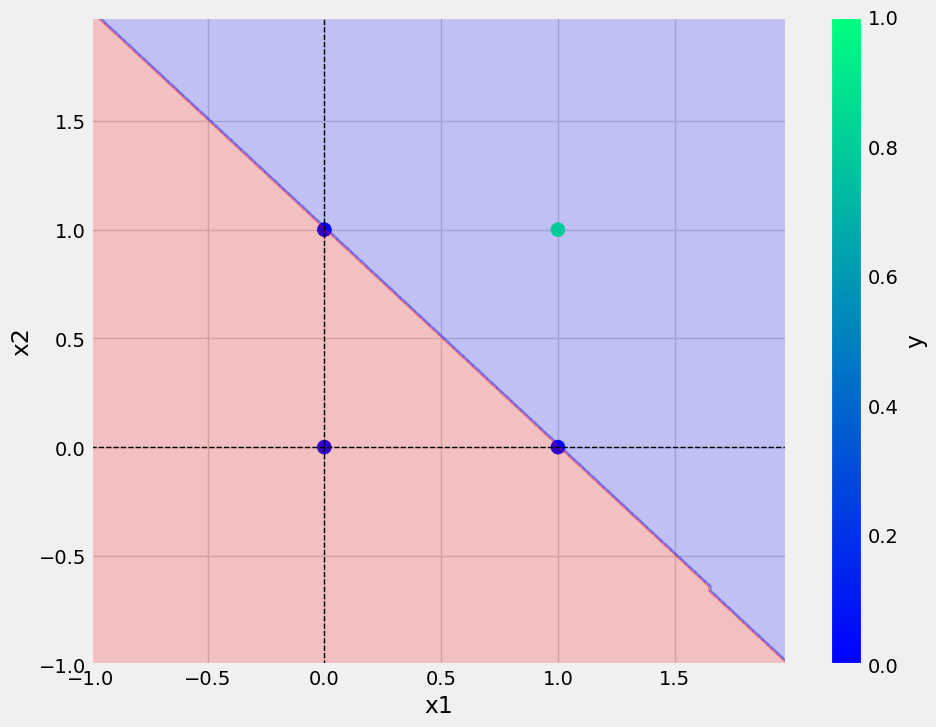

In [36]:
save_plot(df, "and.png", model_AND)

## XOR

In [37]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,0],
}

df = pd.DataFrame(XOR)

df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [38]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_XOR = Perceptron(eta=ETA, epochs=EPOCHS)
model_XOR.fit(X, y)

_ = model_XOR.total_loss()

initial weights before training: 
[-1.36554569e-04 -1.02609730e-05  4.65756598e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 0.29986345  0.29998974 -0.59995342]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[-1.36554569e-04 -1.02609730e-05  4.65756598e-05]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[ 0.29986345  0.29998974 -0.59995342]
######################

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


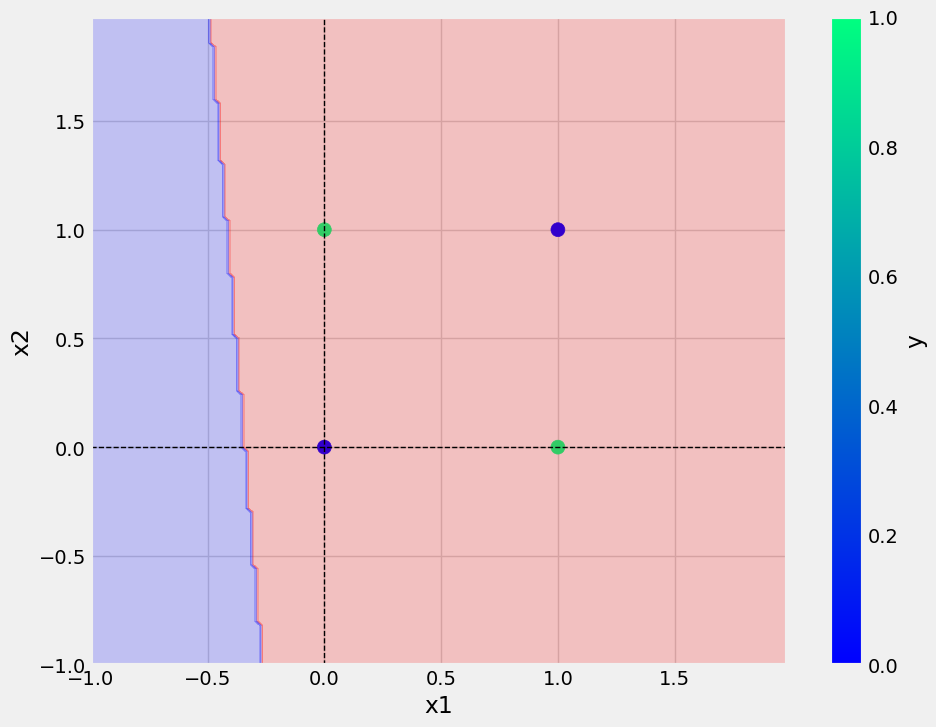

In [39]:
save_plot(df, "xor.png", model_XOR)

## NAND

In [40]:
NAND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [1,1,1,0],
}

df = pd.DataFrame(NAND)

df

,x1,x2,y
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0


In [41]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_NAND = Perceptron(eta=ETA, epochs=EPOCHS)
model_NAND.fit(X, y)

_ = model_NAND.total_loss()

initial weights before training: 
[ 7.55001039e-05 -1.89654412e-04  2.52265628e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 1 0]
error: 
0    1
1    1
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 7.55001039e-05  2.99810346e-01 -5.99974773e-01]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0    0
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[-2.99924500e-01 -1.89654412e-04 -2.99974773e-01]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[1 1 1 0]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[-2.99924500e-01 -1.89654412e-04 -2.99974773e-01

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


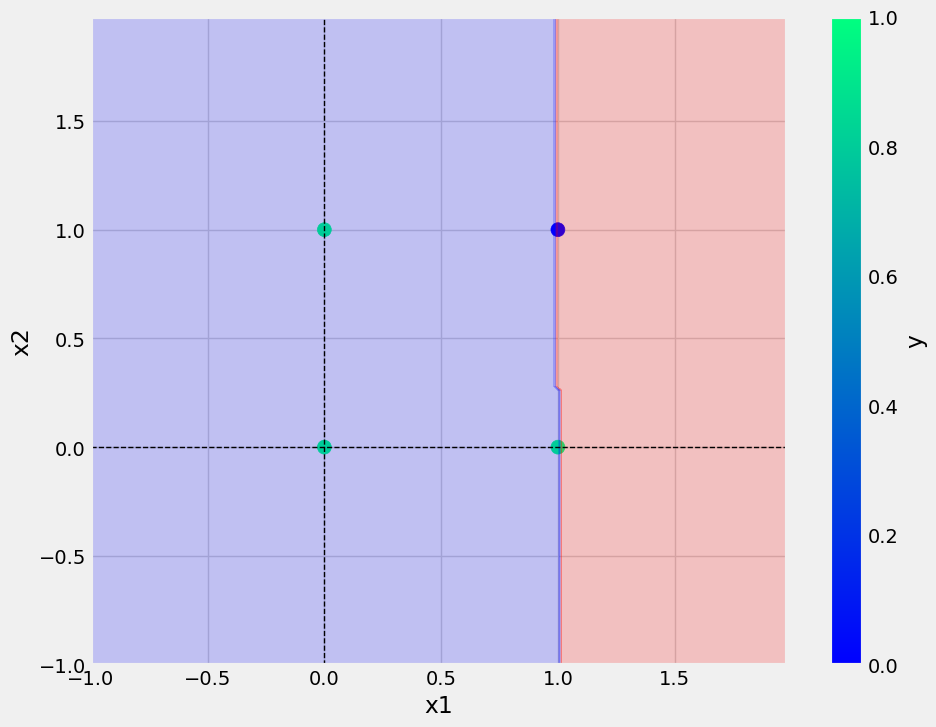

In [42]:
save_plot(df, "Nand.png", model_NAND)